In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv(r'C:\Users\NANDINI\Downloads\ds_2\train.csv')

In [5]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

In [7]:
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [8]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
print(titanic.describe())

       PassengerId         Age       SibSp       Parch        Fare  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000   29.361582    0.523008    0.381594   32.204208   
std     257.353842   13.019697    1.102743    0.806057   49.693429   
min       1.000000    0.420000    0.000000    0.000000    0.000000   
25%     223.500000   22.000000    0.000000    0.000000    7.910400   
50%     446.000000   28.000000    0.000000    0.000000   14.454200   
75%     668.500000   35.000000    1.000000    0.000000   31.000000   
max     891.000000   80.000000    8.000000    6.000000  512.329200   

         Sex_male  Embarked_Q  Embarked_S  
count  891.000000  891.000000  891.000000  
mean     0.647587    0.086420    0.725028  
std      0.477990    0.281141    0.446751  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    1.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000

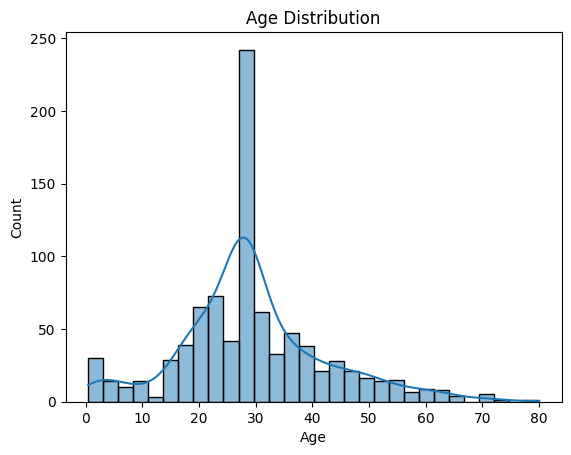

In [10]:
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

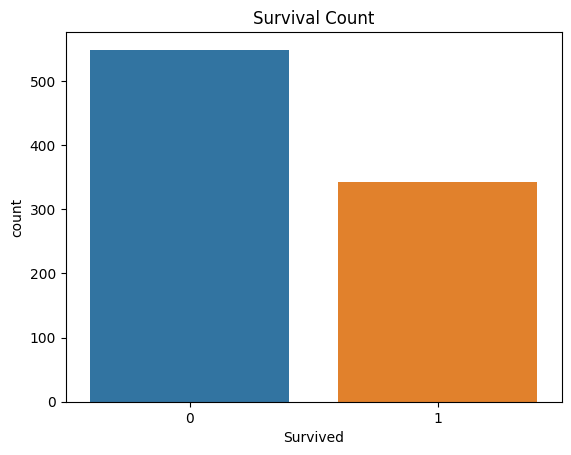

In [11]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

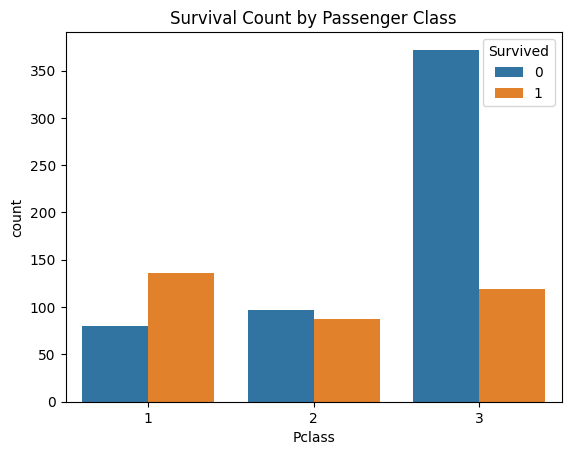

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.show()

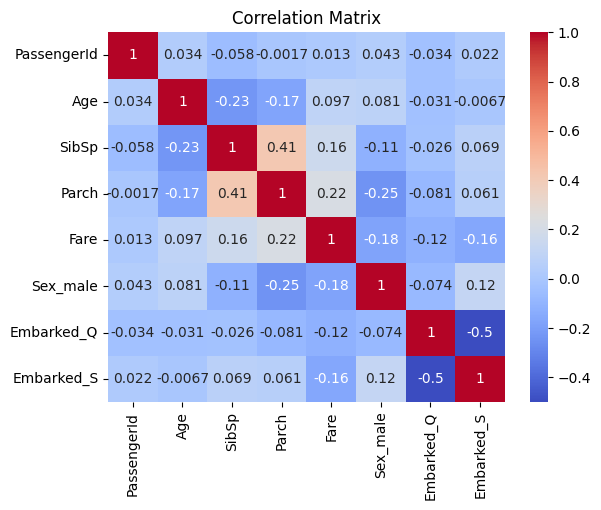

In [13]:
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

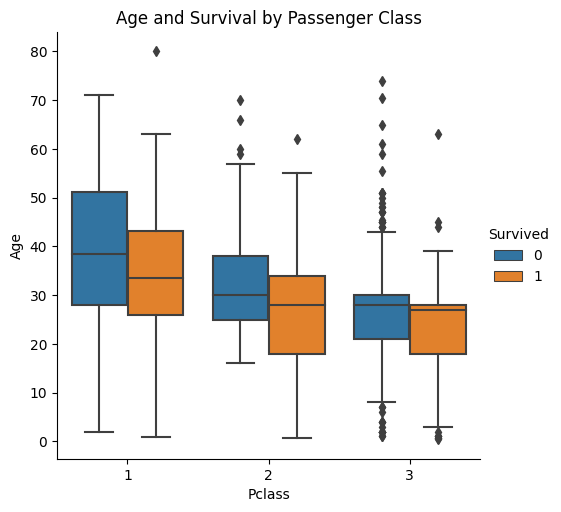

In [14]:
sns.catplot(x='Pclass', y='Age', hue='Survived', kind='box', data=titanic)
plt.title('Age and Survival by Passenger Class')
plt.show()

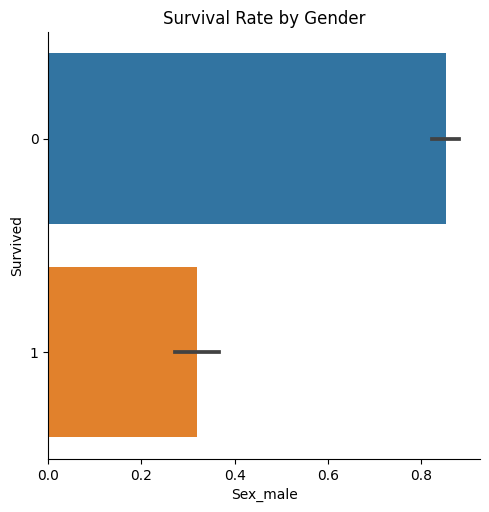

In [15]:
sns.catplot(x='Sex_male', y='Survived', kind='bar', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()